In [1]:
import pandas as pd
import regex as re

In [2]:
df = pd.read_csv("sales_data_sample_dataset.csv",encoding='latin1',parse_dates=['ORDERDATE'])


In [3]:
#understanding the data
#print(df.shape)
print(df.sample(10))
df

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
1596        10177               50     100.00                7   6083.00   
1629        10280               45      47.49               11   2137.05   
1788        10368               31     100.00                5   4223.13   
502         10111               48      49.06                5   2354.88   
1344        10126               43      53.83                9   2314.69   
1027        10184               28     100.00               10   4409.72   
44          10312               48     100.00                3  11623.70   
1324        10207               47     100.00               16   6658.02   
1704        10267               38      87.24                3   3315.12   
490         10289               38     100.00                2   4567.98   

      ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
1596 2003-11-07  Shipped       4        11     2003  ...   
1629 2004-08-17  Shipped       3         8 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
print(df[['PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE']])

      PRODUCTLINE  MSRP PRODUCTCODE              CUSTOMERNAME  \
0     Motorcycles    95    S10_1678         Land of Toys Inc.   
1     Motorcycles    95    S10_1678        Reims Collectables   
2     Motorcycles    95    S10_1678           Lyon Souveniers   
3     Motorcycles    95    S10_1678         Toys4GrownUps.com   
4     Motorcycles    95    S10_1678  Corporate Gift Ideas Co.   
...           ...   ...         ...                       ...   
2818        Ships    54    S72_3212     Euro Shopping Channel   
2819        Ships    54    S72_3212   Oulu Toy Supplies, Inc.   
2820        Ships    54    S72_3212     Euro Shopping Channel   
2821        Ships    54    S72_3212              Alpha Cognac   
2822        Ships    54    S72_3212         Gifts4AllAges.com   

                 PHONE  
0           2125557818  
1           26.47.1555  
2     +33 1 46 62 7555  
3           6265557265  
4           6505551386  
...                ...  
2818    (91) 555 94 44  
2819        981-443

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [6]:
print(df.describe())
df.describe(include='object')


        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count   2823.000000                           2823  2823.000000  2823.000000   
mean    3553.889072  2004-05-11 00:16:49.989373056     2.717676     7.092455   
min      482.130000            2003-01-06 00:00:00     1.000000     1.000000   
25%     2203.430000            2003-11-06 12:00:0

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,6,7,109,92,91,92,9,73,16,73,19,3,77,72,3
top,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


In [7]:
#handling duplicate values
df[df.duplicated(keep=False)] #--> No duplicate rows found in the dataset.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [8]:
#Handling phone numbers.
df.sample(20).PHONE

1707    (171) 555-2282
66          2015559350
1768        4085553659
781         035-640555
2820    (91) 555 94 44
1175        7605558146
765     (91) 555 94 44
336         2125557413
1186        6265557265
2606    (198) 555-8888
2665       0522-556555
2232        4155554312
2227      +65 221 7555
2224        2125557413
2624      +65 224 1555
417       0695-34 6555
153       0921-12 3555
1148    (91) 555 94 44
1372        2035554407
2656        2155551555
Name: PHONE, dtype: object

In [9]:
def clean_phone(x):
    x = str(x)
    if x.startswith('+'):
        number = ''.join(re.findall('[+\\d]',x))
        return number[:]
    else:
        return ''.join(re.findall('\\d',x))

df['PHONE'] = df['PHONE'].apply(clean_phone)
df.sample(20)['PHONE']

1038       +652241555
2588         31123555
2672    +810663425555
1880       1715552282
2393       4155551450
2287       4155551450
2494        915559444
860          86213555
855        4155551450
1060        915559444
1285       6265557265
377        4155554312
1040       4155551450
1535        915559444
2196       0522556555
1587       0695346555
1179       7025551838
1715     +61294958555
997          78325555
461        0522556555
Name: PHONE, dtype: object

In [10]:
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(0)
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
        elif str(df[col].dtype).startswith('datetime'):
            df[col] = df[col].fillna('NIL')

df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2415,10208,30,65.61,15,1968.30,2004-01-02,Shipped,1,1,2004,...,"2, rue du Commerce",Unknown,Lyon,Unknown,69004,France,EMEA,Saveley,Mary,Small
2616,10126,45,100.00,6,4597.20,2003-05-28,Shipped,2,5,2003,...,"C/ Araquil, 67",Unknown,Madrid,Unknown,28023,Spain,EMEA,Sommer,Mart¡n,Medium
918,10215,31,58.71,6,1820.01,2004-01-29,Shipped,1,1,2004,...,3675 Furth Circle,Unknown,Burbank,CA,94019,USA,Unknown,Thompson,Steve,Small
2766,10386,44,86.40,15,3801.60,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",Unknown,Madrid,Unknown,28034,Spain,EMEA,Freyre,Diego,Medium
1308,10326,50,86.01,5,4300.50,2004-11-09,Shipped,4,11,2004,...,Berguvsvgen 8,Unknown,Lule,Unknown,S-958 22,Sweden,EMEA,Berglund,Christina,Medium


In [11]:
df['Name'] = df['CONTACTFIRSTNAME'] + ' ' + df['CONTACTLASTNAME']
df.drop(columns=['CONTACTFIRSTNAME','CONTACTLASTNAME'],inplace=True)


In [12]:
df.insert(1, 'Name', df.pop('Name'))
df


,ORDERNUMBER,Name,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,Kwai Yu,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Small
1,10121,Paul Henriot,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,Reims Collectables,26471555,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Small
2,10134,Daniel Da Cunha,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,Lyon Souveniers,+33146627555,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Medium
3,10145,Julie Young,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Medium
4,10159,Julie Brown,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,Unknown,San Francisco,CA,Unknown,USA,Unknown,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,Diego Freyre,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,...,Euro Shopping Channel,915559444,"C/ Moralzarzal, 86",Unknown,Madrid,Unknown,28034,Spain,EMEA,Small
2819,10373,Pirkko Koskitalo,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,...,"Oulu Toy Supplies, Inc.",981443655,Torikatu 38,Unknown,Oulu,Unknown,90110,Finland,EMEA,Medium
2820,10386,Diego Freyre,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,...,Euro Shopping Channel,915559444,"C/ Moralzarzal, 86",Unknown,Madrid,Unknown,28034,Spain,EMEA,Medium
2821,10397,Annette Roulet,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,...,Alpha Cognac,61776555,1 rue Alsace-Lorraine,Unknown,Toulouse,Unknown,31000,France,EMEA,Small


In [13]:
df.columns

Index(['ORDERNUMBER', 'Name', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

In [14]:
"Summary of the data set"
#Total Sales
sales = df['SALES'].sum()
print(f'The total revenue generated : {sales} rupees.')

#Unique orders
unique_order = df['ORDERNUMBER'].nunique()
print(f"Total unique orders : {unique_order}")

The total revenue generated : 10032628.85 rupees.
Total unique orders : 307


In [15]:
#Sales by Country
sales_by_country = df.groupby("COUNTRY")['SALES'].sum().sort_values(ascending=False)
print(f"Country wise sales : {sales_by_country}")

Country wise sales : COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='MONTH'>

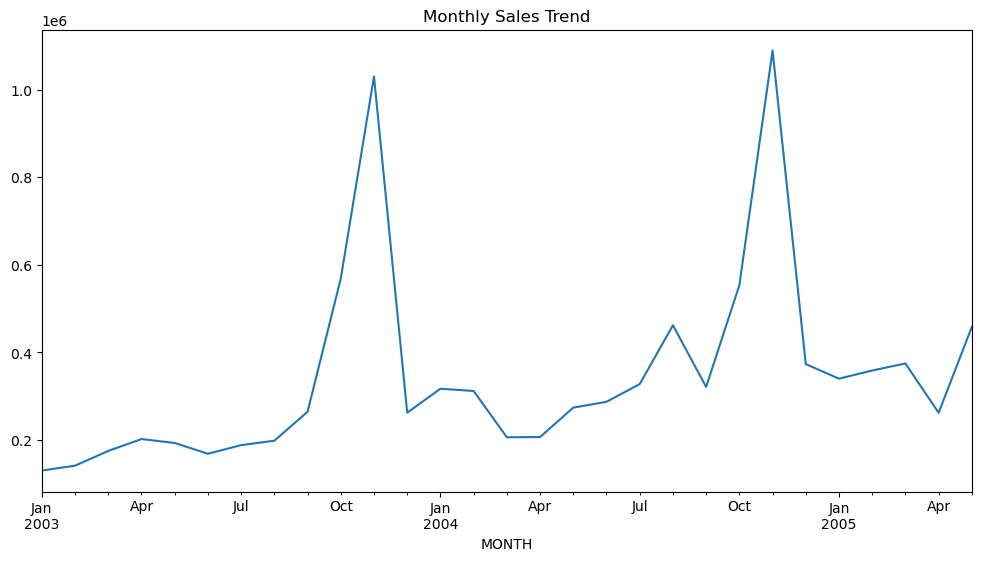

In [16]:
df['MONTH'] = df['ORDERDATE'].dt.to_period('M')
df.groupby('MONTH')['SALES'].sum().plot(kind='line', figsize=(12,6), title='Monthly Sales Trend')

In [17]:
#Sales by month
sales_by_month = df.groupby('MONTH')['SALES'].sum()
print(sales_by_month)

MONTH
2003-01     129753.60
2003-02     140836.19
2003-03     174504.90
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     568290.97
2003-11    1029837.66
2003-12     261876.46
2004-01     316577.42
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64


In [18]:
#Which product lines bring in the most revenue?
print(df.groupby('PRODUCTLINE')['SALES'].agg(['sum','count']).sort_values(by='sum',ascending=False))

                         sum  count
PRODUCTLINE                        
Classic Cars      3919615.66    967
Vintage Cars      1903150.84    607
Motorcycles       1166388.34    331
Trucks and Buses  1127789.84    301
Planes             975003.57    306
Ships              714437.13    234
Trains             226243.47     77


In [19]:
#top 10 Customers by sales
top_10 = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
print(f"The top 10 customers by sales are :\n {top_10}")

The top 10 customers by sales are :
 CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64


In [22]:

df.to_csv('exported_data.csv')